In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

np.random.seed(42)

In [111]:
path = r"C:\Users\Rodger\Documents\GitHub\DengAI\data"


train = pd.read_csv(path+'/dengue_features_train.csv',
                    parse_dates=['week_start_date'])
test = pd.read_csv(path+'/dengue_features_test.csv',
                   parse_dates=['week_start_date'])
train['cases'] = pd.read_csv(path+'/dengue_labels_train.csv', usecols=[3])

In [112]:
#train.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
#test.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [113]:
ltrain = train.shape[0]
df = pd.concat([train,test], sort=False).set_index('week_start_date')  
print('Combined df shape:{}'.format(df.shape))

Combined df shape:(1872, 24)


In [114]:
# drop constant column
# constant_column = [col for col in df.columns if df[col].nunique() == 1]
# print('drop CONSTANT columns:', constant_column)
# df.drop(constant_column, axis=1, inplace=True)

# corr_matrix = df.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [c for c in upper.columns if any(upper[c] > 0.98)]
# del upper

# print('drop SIMILAR columns:', to_drop)
# df.drop(to_drop,1,inplace=True)

In [115]:
train = df[:ltrain].copy()
test = df[ltrain:].copy()
del df

In [149]:
train_sj_backup = train[train.city=='sj']['cases']
train_iq_backup = train[train.city=='iq']['cases']
train['cases_log'] = train['cases'].copy()
train['cases_log'] += 1
train['cases_log'] = np.log(train['cases_log'])

In [150]:
drop_cols = ['city']

y_sj = train[train.city=='sj']['cases']
y_iq = train[train.city=='iq']['cases']

train_sj = train[train.city=='sj'].drop(drop_cols,1)
train_iq = train[train.city=='iq'].drop(drop_cols,1)

test_sj = test[test.city=='sj'].drop(drop_cols,1)
test_iq = test[test.city=='iq'].drop(drop_cols,1)

# San José

In [151]:
model_sj = Prophet(yearly_seasonality=True,
                   weekly_seasonality = 1,
                   daily_seasonality=False,
                   seasonality_mode='multiplicative'
                ).add_seasonality(name='monthly', period=30.5, fourier_order=4, prior_scale=0.5
                ).add_seasonality(name='quarterly', period=365.25/4, fourier_order=12, prior_scale=1)



In [152]:
model_sj.fit(train_sj.reset_index().rename(columns={'week_start_date':'ds', 'cases_log':'y'}))

## Training data

In [153]:
pred_sj_train = model_sj.predict(df=train_sj.reset_index().rename(columns={'week_start_date':'ds'}))

In [176]:
print(len(train_sj))

936


In [169]:
pred_normed = np.e**(pred_sj_train.yhat)
print(pred_normed-1)

0      8.539848
1      7.982169
2      7.410179
3      6.550471
4      9.568858
         ...   
931    8.593394
932    7.473652
933    6.986516
934    7.168106
935    6.893185
Name: yhat, Length: 936, dtype: float64


In [170]:
print(mean_absolute_error(train_sj_backup, pred_normed))

20.15473779113476


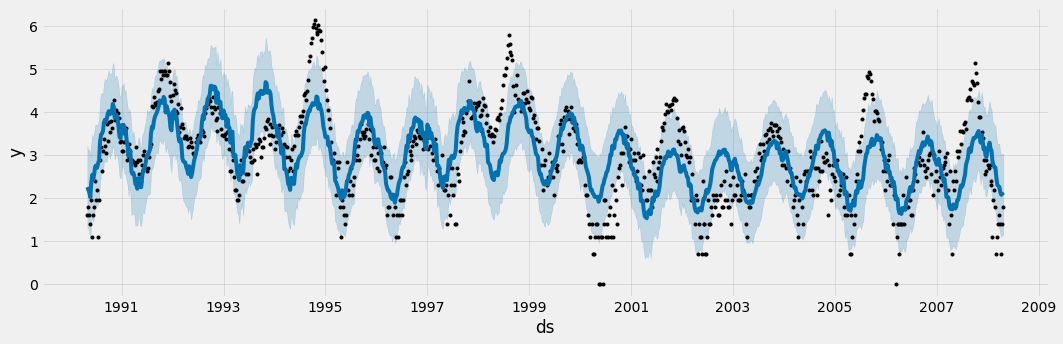

In [156]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_sj.plot(pred_sj_train, ax=ax)

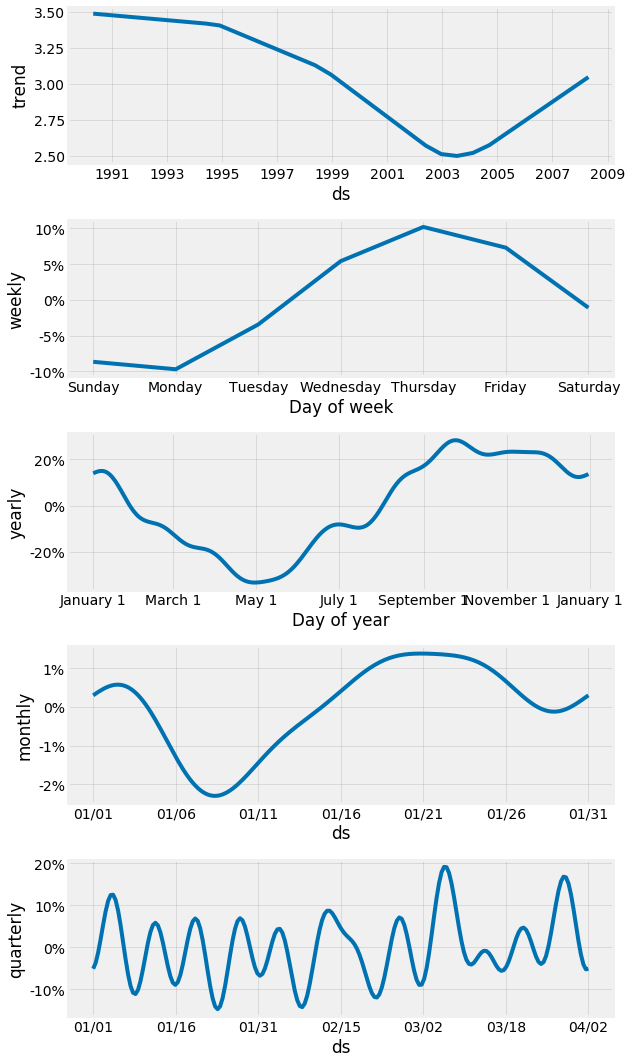

In [157]:
# Plot the components
fig = model_sj.plot_components(pred_sj_train)

## Test data

In [158]:
pred_sj = model_sj.predict(df=test_sj.reset_index().rename(columns={'week_start_date':'ds'}))


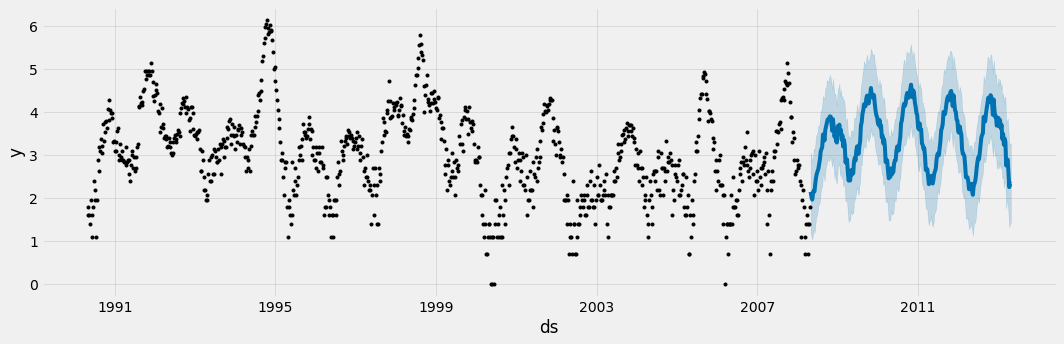

In [159]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_sj.plot(pred_sj, ax=ax)

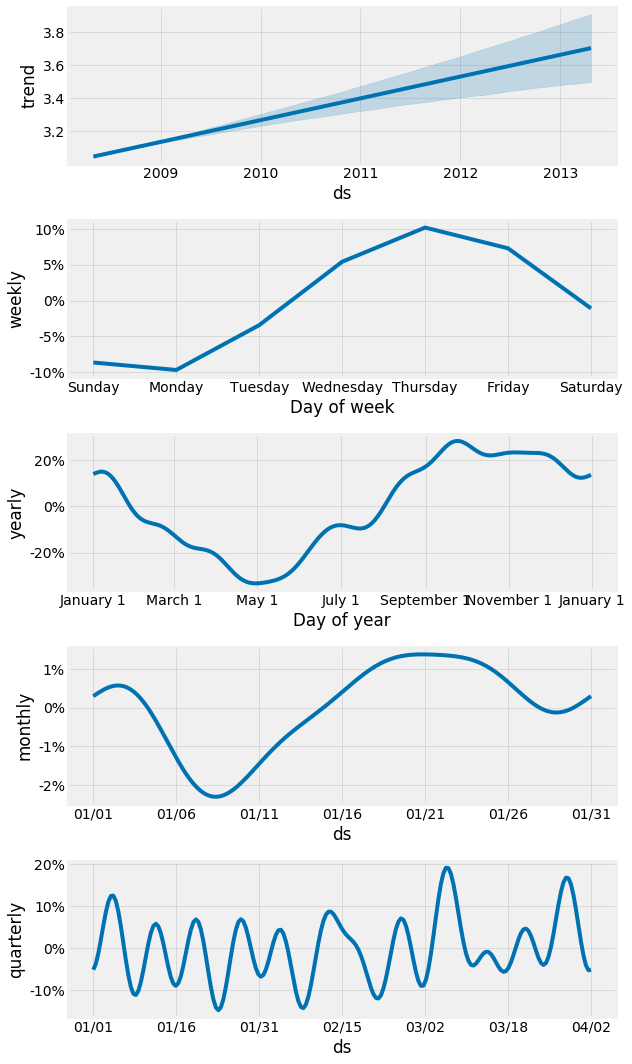

In [206]:
# Plot the components
fig = model_sj.plot_components(pred_sj)

In [195]:
pred_sj = model_sj.predict(df=test_sj.reset_index().rename(columns={'week_start_date':'ds'}))
predictions_sj = (np.e**((pred_sj.yhat.values)-1))

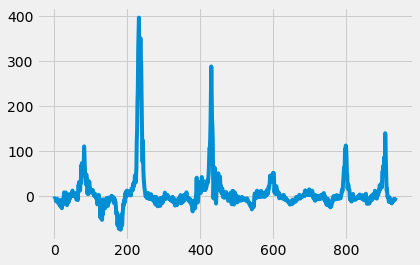

In [218]:
plt.plot(error_sj)

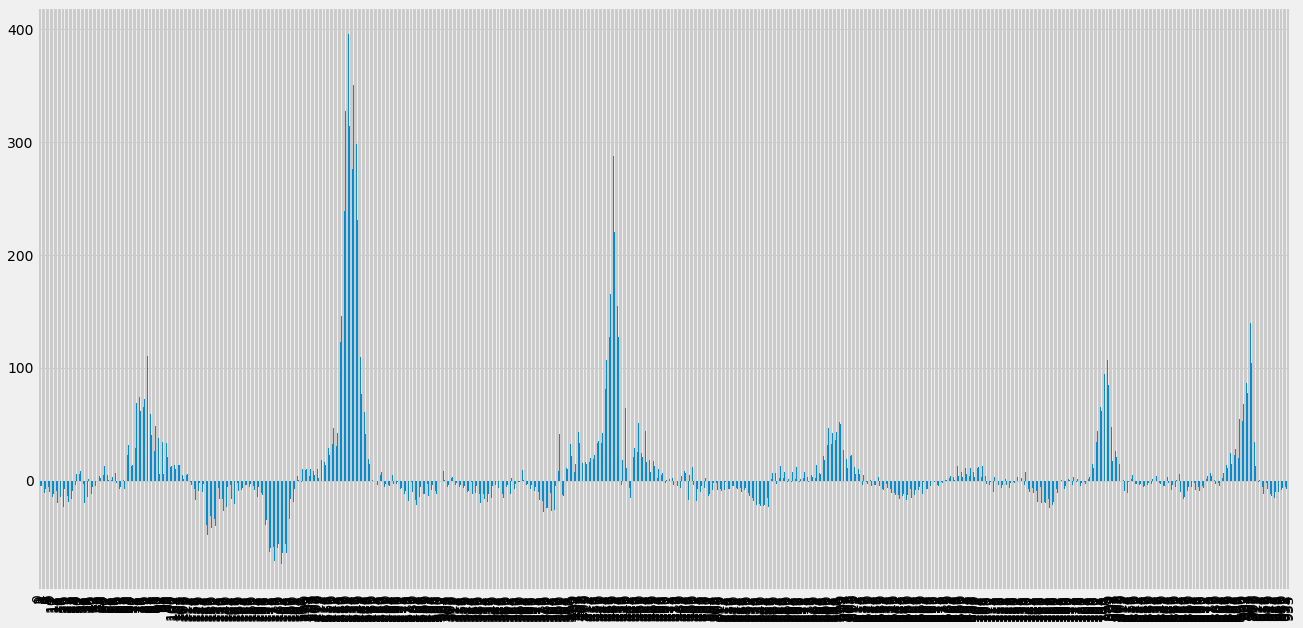

In [216]:
error_sj = train_sj_backup.values - pred_normed
error_sj

plt.figure(figsize=(20,10))
plt.
error_sj.plot.bar()

In [211]:
error_sj.type

AttributeError: 'Series' object has no attribute 'type'

# Iquana

In [161]:
model_iq = Prophet(yearly_seasonality=True,
                    weekly_seasonality=1,
                    daily_seasonality=False,
                    seasonality_mode='multiplicative'
                ).add_seasonality(name='monthly', period=30.5, fourier_order=4
                )

In [162]:
model_iq.fit(train_iq.reset_index().rename(columns={'week_start_date':'ds', 'cases_log':'y'}))
pred_iq = model_iq.predict(df=test_iq.reset_index().rename(columns={'week_start_date':'ds'}))

## Training data

In [163]:
pred_iq_train = model_iq.predict(df=train_iq.reset_index().rename(columns={'week_start_date':'ds'}))


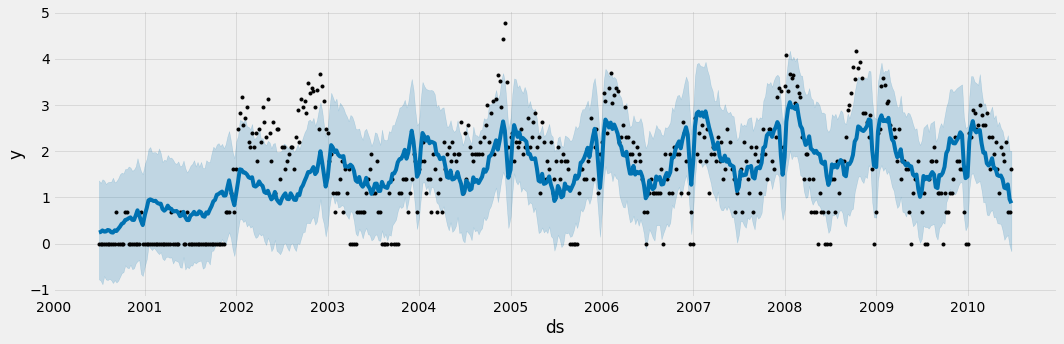

In [164]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_iq.plot(pred_iq_train, ax=ax)

In [ ]:
pred_iq = model_iq.predict(df=test_iq.reset_index().rename(columns={'week_start_date':'ds'}))
predictions_iq = (np.e**((pred_iq.yhat.values)-1))

In [217]:
error_iq = train_iq_backup.values - predictions_iq
error_iq

plt.figure(figsize=(20,10))
error_iq.plot.bar()

ValueError: operands could not be broadcast together with shapes (520,) (156,) 

## Test data

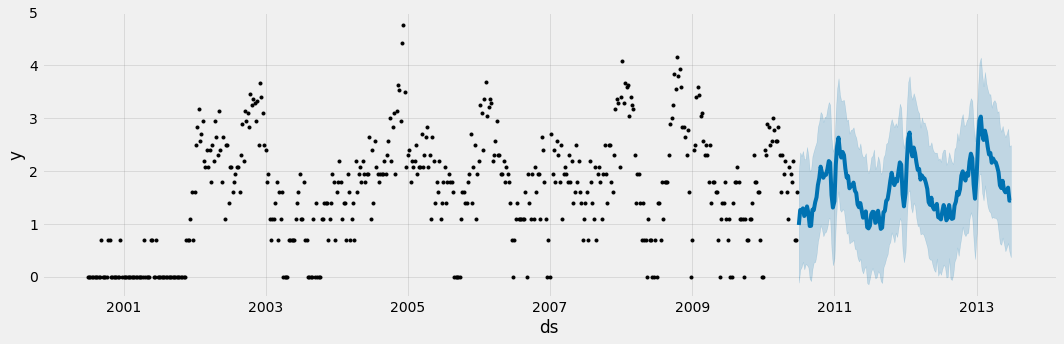

In [165]:


# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model_iq.plot(pred_iq, ax=ax)



In [199]:
pred_iq = model_iq.predict(df=test_iq.reset_index().rename(columns={'week_start_date':'ds'}))
predictions_iq = (np.e**((pred_iq.yhat.values)-1))

In [200]:
predictions_iq

array([0.9784029 , 1.29965043, 1.28006851, 1.34074162, 1.15957725,
       1.21360479, 1.39181333, 1.23239511, 0.95985672, 0.96292634,
       1.30814938, 1.29860025, 1.50217717, 1.65392746, 2.08341386,
       2.37466562, 2.95196767, 2.631492  , 2.39197672, 2.54134772,
       2.53090735, 2.82608275, 3.28274616, 3.18971152, 1.72527417,
       1.36164001, 1.53415624, 3.07209303, 4.37674211, 5.11544892,
       3.91332963, 3.50608701, 3.9007522 , 3.67829493, 2.85042308,
       2.401776  , 2.47324205, 1.96012761, 2.03098605, 2.06690815,
       2.18327766, 1.87278655, 1.79209116, 1.44470691, 1.36921097,
       1.48225006, 1.28396514, 1.12380412, 1.14170274, 1.26602848,
       0.93833468, 0.91696186, 0.96460143, 1.19417208, 1.2578115 ,
       1.25028694, 1.0185424 , 1.04681779, 1.28157451, 1.08410744,
       0.90899273, 0.93046288, 1.24634158, 1.2775984 , 1.54805755,
       1.59143159, 1.8622387 , 2.26202551, 2.62903684, 2.27554087,
       2.08171961, 2.33158808, 2.2302164 , 2.70418567, 3.20165

# Results

In [167]:
pred_normed_iq = np.e**(pred_iq_train.yhat)
print(pred_normed_iq - 1)

0      0.269117
1      0.285366
2      0.328817
3      0.294014
4      0.297781
         ...   
515    2.350122
516    2.295504
517    2.599051
518    1.609518
519    1.390552
Name: yhat, Length: 520, dtype: float64


In [168]:
# MAE on training data in San José
print(mean_absolute_error(train_sj_backup, pred_normed))
# and in Iquana
print(mean_absolute_error(train_iq.cases, pred_normed_iq))

20.15473779113476
5.2407147303359265


# Formatting predictions for hand in

In [201]:
preds = np.concatenate((predictions_sj, predictions_iq), axis=0).clip(0)

In [202]:
print(preds.shape)

(416,)


In [203]:
preds

array([ 3.14590087,  2.79336179,  2.62011802,  2.98472806,  3.22583511,
        3.18187388,  3.83412351,  4.37603266,  4.80481164,  5.07717201,
        5.36403525,  5.99262124,  6.64540216,  7.994669  ,  8.48656921,
        8.91051918, 11.95126131, 11.43908652, 10.38648052, 13.25648716,
       14.36125761, 15.45697959, 16.84042105, 16.76846324, 17.34744859,
       18.18905857, 18.0458932 , 15.62692224, 12.98576487, 17.01930282,
       13.93934078, 11.32059538, 12.73529992, 10.2644922 ,  9.8811653 ,
       14.48685132, 13.60378364, 14.99372679, 12.24645581, 13.27679138,
       10.53460751, 11.65850501,  9.00517605, 10.51037884,  9.32666041,
        6.23055256,  6.62759714,  6.67676682,  4.90730962,  4.08664475,
        4.32381187,  4.09027513,  5.18930163,  4.68213589,  5.20614942,
        4.83003234,  6.33343858,  6.90657185,  6.50499791,  8.14087714,
        9.04722052,  7.91737822,  7.59257148,  9.05725662, 10.14099336,
       14.65041802, 15.84078947, 19.22872985, 20.78875541, 24.09

In [204]:
test['total_cases'] = np.round(preds,0)
test[['city','year','weekofyear','total_cases']].to_csv('submission_prophet.csv', float_format='%.0f', index=False)